In [1]:
from platform import python_version

print(python_version())

3.11.13


In [4]:
!pip install "qc-grader[qiskit,jupyter] @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git" --no-deps

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-aysjaw_b/qc-grader_5b0f6d87c02247a1af1b878ac3c10143
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-aysjaw_b/qc-grader_5b0f6d87c02247a1af1b878ac3c10143
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 897f4448b14d18b4d0a430f57f11c2dcb6200c20
  Preparing metadata (setup.py) ... done


In [5]:
import qiskit
import qc_grader

print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.0
Grader version: 0.22.9


In [ ]:
your_api_key = "enter your Api key here"
your_crn = "enter your CRN here"

from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
    channel="ibm_quantum_platform",
    token=your_api_key,
    instance=your_crn,
    name="qgss-2025",
    overwrite=True
)

In [ ]:
service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'token',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/40b27075d7c34b02bc4479d6db856fc8:01702384-c52d-4f72-a651-75ca6450c112::',
  'verify': True,
  'private_endpoint': False}}

In [8]:
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import SparsePauliOp

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator

from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import grade_lab0_ex1, grade_lab0_ex2

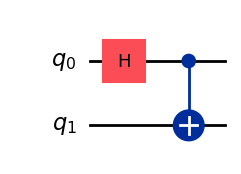

In [10]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw("mpl")

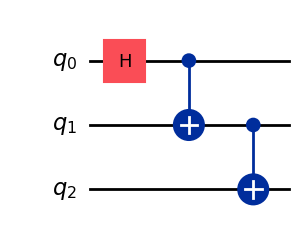

In [ ]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.draw("mpl")

In [12]:
grade_lab0_ex1(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


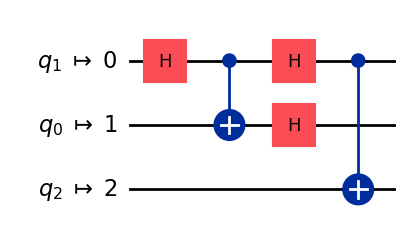

In [ ]:
coupling_map = [[0, 1], [0, 2]]
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(optimization_level=3, coupling_map=coupling_map)
qc_transpiled = pm.run(qc)


qc_transpiled.draw("mpl")


In [ ]:
grade_lab0_ex2(qc_transpiled)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
qc.measure_all()
backend = AerSimulator()
sampler = Sampler(mode=backend)
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
job = sampler.run(pm.run([qc]))
results_sampler = job.result()

In [ ]:
estimator = Estimator(mode=backend)

ZZZ = SparsePauliOp("ZZZ")
ZZX = SparsePauliOp("ZZX")
ZII = SparsePauliOp("ZII")
XXI = SparsePauliOp("XXI")
ZZI = SparsePauliOp("ZZI")
III = SparsePauliOp("III")
observables = [ZZZ, ZZX, ZII, XXI, ZZI, III]

pub = (qc, observables)
job = estimator.run(pubs=[pub])

results_estimator = job.result()

  Outcomes : {'000': 517, '111': 507}


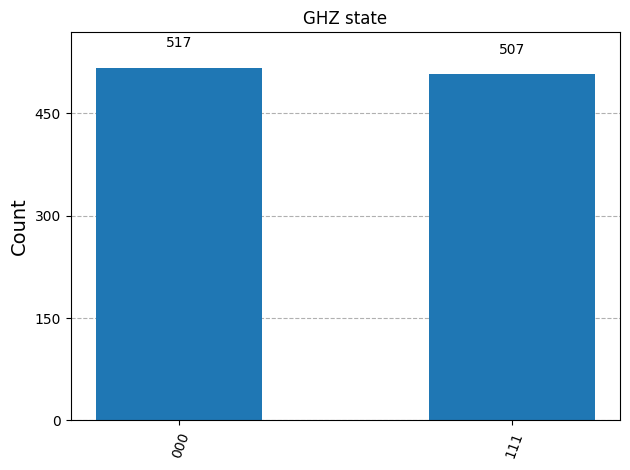

In [17]:
counts_list = results_sampler[0].data.meas.get_counts()
print(f"  Outcomes : {counts_list}")
display(plot_histogram(counts_list, title="GHZ state"))

Expectation values: [('ZZZ', np.float64(-0.01513671875)), ('ZZX', np.float64(0.017578125)), ('ZII', np.float64(-0.001953125)), ('XXI', np.float64(-0.0146484375)), ('ZZI', np.float64(1.0)), ('III', np.float64(1.0))]


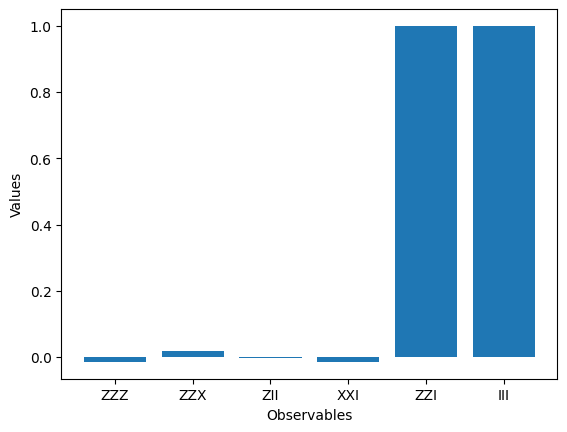

In [ ]:
exp_values = results_estimator[0].data.evs
observables_list = ["ZZZ", "ZZX", "ZII", "XXI", "ZZI", "III"]
print(f"Expectation values: {list(zip(observables_list, exp_values))}")
container = plt.bar(observables_list, exp_values, width=0.8)
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

In [19]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1016 participants have completed this lab
Lab 1: 0/9 exercises completed (0%)
    ✅ 4 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
